# _Analysis By: Daniel Bright_
   **For**
# Project: Wrangling and Analyze Data

## Data Gathering

1. _**twitter_archive_enhanced.csv have been downloaded from lesson 4 of Project: Wrangle and Analyze Data and uploaded to this workspace.**_ I am going to import that using pandas import function.

In [2]:
#Let's import the uploaded twitter_archive_enhanced.csv
import pandas as pd
df_tae=pd.read_csv('twitter-archive-enhanced.csv',sep=',')

In [3]:
#Let's view the table
df_tae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. _Using  Requests library to download the tweet image prediction (image_predictions.tsv)_

In [4]:
#Let's download image_predictions file programmatically
import requests
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
response

<Response [200]>

In [5]:
open("image-predictions.tsv", mode='wb').write(response.content)

335079

In [6]:
#Let's import and view the image file 
img=pd.read_table('image-predictions.tsv',sep='\t')
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. _Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)_ **

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import configparser

In [8]:
con= configparser.ConfigParser()
con.read('configtwi.ini')


['configtwi.ini']

In [9]:
consumer_key = con['twitter']['api_key']
consumer_secret = con['twitter']['api_key_secret']
access_token = con['twitter']['access_token']
access_secret = con['twitter']['access_token_secret']

In [10]:
auth= tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
api= tweepy.API(auth)

In [11]:
# Let's create a list for the tweet_id in df_tae
tweet_ids = df_tae.tweet_id.values
len(tweet_ids)

2356

In [12]:
count = 0
fails_dict = {}
start = timer()

In [13]:
# Let's extract and create new table with the tweet_id using looping
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
api = tweepy.API(auth, wait_on_rate_limit=True)
print(end - start)
print(fails_dict)

In [14]:
#len(fails_dict)

In [15]:
df_apt=[]
with open('tweet_json.txt',mode='r',encoding='utf-8') as file:
    for line in file:
        dt=json.loads(line)
        tweets={'tweet_id':dt['id'],'retweet_id':dt['retweet_count'],'favorite_count':dt['favorite_count']}
        df_apt.append(tweets)
        df2=pd.DataFrame(df_apt,columns=['tweet_id','retweet_id','favorite_count'])

In [16]:
df2.head()

,tweet_id,retweet_id,favorite_count
0,892420643555336193,6969,33696
1,892177421306343426,5272,29222
2,891815181378084864,3464,21977
3,891689557279858688,7191,36791
4,891327558926688256,7717,35145


## Assessing Data
In this section, I will detected and documented  **eight (8) quality issues and two (2) tidiness issue**,use **visual assessment
 and programmatic assessement** to assess the data.

Let's run some **Virtual Assessment** to have idea of what our datasets looks like.

In [17]:
#let's see what the twitter archive data looks like
df_tae

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
# Let's see what the image prediction looks like and detect if there are issues to fix
img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
# To see what the data extracted from twitter looks like,let's view it.
df2

,tweet_id,retweet_id,favorite_count
0,892420643555336193,6969,33696
1,892177421306343426,5272,29222
2,891815181378084864,3464,21977
3,891689557279858688,7191,36791
4,891327558926688256,7717,35145
5,891087950875897856,2586,17749
6,890971913173991426,1647,10331
7,890729181411237888,15679,56666
8,890609185150312448,3604,24426
9,890240255349198849,6068,27849


Time to view our data set **Progammatical** to detect issues

In [20]:
# Let's check the datatypes,number of rows and columns and null values in the twitter archive data
df_tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
# To see the measures in the dataset
df_tae.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### *Let's see the properties of some columns*

In [22]:
df_tae.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Bailey        7
Buddy         7
Daisy         7
an            7
Toby          7
Dave          6
Jack          6
Milo          6
Oscar         6
Koda          6
Stanley       6
Jax           6
Rusty         6
Scout         6
Leo           6
Bella         6
Sunny         5
           ... 
Marty         1
Brat          1
Jordy         1
Jarvis        1
Holly         1
Marvin        1
Aldrick       1
Berkeley      1
Maude         1
Harlso        1
Barney        1
Jimbo         1
Tove          1
Comet         1
my            1
Noosh         1
Huck          1
Tedrick       1
Rambo         1
Brian         1
Darla         1
Remus         1
Staniel       1
Brownie       1
Jennifur      1
his           1
Stu           1
Butters       1
Doobert       1
Tupawc        1
Name: name, Length: 957,

In [23]:
df_tae.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
df_tae.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [25]:
sum(df_tae.retweeted_status_timestamp.isnull())
sum(df_tae.retweeted_status_id.isnull())
sum(df_tae.retweeted_status_user_id.isnull())
sum(df_tae.in_reply_to_status_id.isnull())
sum(df_tae.in_reply_to_user_id.isnull())

2278

In [26]:
df_tae.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [27]:
# Let's check the datatypes,number of rows and columns and null values in the image prediction dataset
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
img.p1.value_counts().sample(50)

Chesapeake_Bay_retriever     23
cash_machine                  2
home_theater                  6
Samoyed                      43
miniature_schnauzer           4
pencil_box                    1
ibex                          1
geyser                        2
microwave                     1
boxer                        10
Italian_greyhound            16
fire_engine                   1
ice_bear                      6
prison                        3
Border_terrier                7
chimpanzee                    2
silky_terrier                 1
Eskimo_dog                   18
malinois                      9
Christmas_stocking            3
king_penguin                  1
polecat                       1
Rhodesian_ridgeback           4
walking_stick                 1
teddy                        18
doormat                       8
frilled_lizard                2
dining_table                  1
chow                         44
Weimaraner                    4
crane                         1
golden_r

In [29]:
# Let's check commom columns in df_tae and img
a=df_tae.columns.intersection(img.columns)
a

Index(['tweet_id'], dtype='object')

In [30]:
# Let's check commom columns in df_tae and df2
b=df_tae.columns.intersection(df2.columns)
b

Index(['tweet_id'], dtype='object')

### Tidiness

1.Timestamp column containing two variables time and date.

2. doggo,floofer,pupper should be one column named stage_name.

3. the 3 datasets should be merged as one to get a complete dataset.

### Quality 
1. **nan values in favourite_count since it will be needed for analysis.**
2. **Some rows containing names that are not dog name in the Image_prediction dataset(img).** **_(inaccurate data)_**
3. **[in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,in_reply_to_status_id,
in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id] contains  missing values.** **_(Missing data)_**
4. **Underscore in ['p1,p2 and p3'] is not useful and names started with an upper case while some with a lower case** **_(inconsistency)_**.
5. **['source] contains links and characters that are not neccesary,whereas it should show something like _Twitter for Iphone_ which is proper source. **  **_(Unwanted data)_**
6. **Empty rows,incorrect datatype in stage_name. _(missing values and incorrect datatype)_**
7. **Incorrect datatype for date and time(object instead of datetime and timedelta),retweet_id and favorite_count(float instead of int).** **_Incorrect datatype_**

8. **Rating denominator not equal to 10 in rating_denominator column.** **_(Inaccurate data)_**



## Cleaning Data
In this section, I will clean **all** of the issues I documented while assessing. 

I will start by making copies of the original datasets

In [31]:
# Make copies of original pieces of data
df=df_tae.copy()
df_now= img.copy()
df_tweet= df2.copy()

### T. Issue 1:
_Timestamp column containing two variables time and date_

### Define:
Let's split timestamp column into two(time and date) using split function,then drop the timestamp column.

#### Code

In [32]:
new=df_tae.timestamp.str.split(expand=True,n=1)
df['date']=new[0]
df['time']= new[1]
df.drop(columns=['timestamp'],inplace=True)

#### Test

In [33]:
#lets view df using .head to see changes
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56 +0000
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27 +0000
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03 +0000
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51 +0000
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24 +0000


### T. Issue 2: 


#### Define
Let's join doggo,floofer,pupper and puppo into one column since they are _stage names_ using concatenation,then drop the doggo,floofer,pupper and puppo columns.

#### Code

In [34]:
import numpy as np
df.doggo.replace('None', '', inplace=True)
df.floofer.replace('None', '', inplace=True)
df.pupper.replace('None', '', inplace=True)
df.puppo.replace('None', '', inplace=True)
df.doggo.replace(np.NaN, '', inplace=True)
df.floofer.replace(np.NaN, '', inplace=True)
df.pupper.replace(np.NaN, '', inplace=True)
df.puppo.replace(np.NaN, '', inplace=True)

In [35]:
# Let's join the 3 columns as one using concat(+)
df['stage_name']= df['doggo'] + df['floofer'] + df['pupper'] + df['puppo']
df.loc[df.stage_name == 'doggopupper', 'stage_name'] = 'doggo, pupper'
df.loc[df.stage_name == 'doggopuppo', 'stage_name'] = 'doggo, puppo'
df.loc[df.stage_name == 'doggofloofer', 'stage_name'] = 'doggo, floofer'

In [36]:
# Let's drop doggo,floofer,pupper and puppo columns 
df.drop(['doggo','floofer','pupper','puppo'],inplace=True,axis=1)

#### Test

In [37]:
df.stage_name.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage_name, dtype: int64

In [38]:
# Using the .columns to see changes
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'date', 'time', 'stage_name'],
      dtype='object')

### T. Issue 3
The 3 datasets should be merged as one to get a complete dataset.

### Define 
Let's merge the datasets into one since tweet_id is common in steps

### Code

In [39]:
df1=pd.merge(df_now,df2,on=['tweet_id'],how='left')
df1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_id,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN,NaN


In [40]:
# second merging
df3=pd.merge(df1,df,on=['tweet_id'],how='left')
df3.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage_name
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,2015-11-15,22:32:08 +0000,
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,2015-11-15,23:05:30 +0000,
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,2015-11-15,23:21:54 +0000,
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,2015-11-16,00:04:52 +0000,
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,2015-11-16,00:24:50 +0000,


### Test

In [41]:
df3.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage_name
371,672980819271634944,https://pbs.twimg.com/media/CVbodBOUsAAb7jZ.jpg,1,car_mirror,0.232754,False,basset,0.219461,True,beagle,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672980819...,5,10,None,2015-12-05,03:28:25 +0000,
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,2017-03-18,00:15:37 +0000,
1326,757354760399941633,https://pbs.twimg.com/media/CoKqIndWgAAattd.jpg,1,Italian_greyhound,0.914667,True,whippet,0.047774,True,ice_lolly,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757354760...,8,10,Devón,2016-07-24,23:20:20 +0000,
1162,734912297295085568,https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg,1,Maltese_dog,0.847292,True,feather_boa,0.059379,False,Old_English_sheepdog,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734912297...,10,10,Jax,2016-05-24,01:02:00 +0000,
164,668975677807423489,https://pbs.twimg.com/media/CUit1O1WoAEBHjj.jpg,1,basset,0.605437,True,Welsh_springer_spaniel,0.184783,True,Saint_Bernard,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668975677...,11,10,Jeremy,2015-11-24,02:13:25 +0000,
1891,849051919805034497,https://pbs.twimg.com/media/C8hwNxbXYAAwyVG.jpg,1,fountain,0.997509,False,American_black_bear,0.001413,False,sundial,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849051919...,13,10,Kevin,2017-04-04,00:12:06 +0000,
723,686007916130873345,https://pbs.twimg.com/media/CYUwjz-UAAEcdi8.jpg,1,Rhodesian_ridgeback,0.885301,True,redbone,0.042335,True,seat_belt,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686007916...,11,10,None,2016-01-10,02:13:27 +0000,pupper
932,703268521220972544,https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg,1,wool,0.525434,False,fur_coat,0.236391,False,kuvasz,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703268521...,12,10,None,2016-02-26,17:20:56 +0000,pupper
955,705239209544720384,https://pbs.twimg.com/media/CcmDUjFW8AAqAjc.jpg,1,Chihuahua,0.157950,True,toy_terrier,0.089920,True,Mexican_hairless,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705239209...,11,10,Jimothy,2016-03-03,03:51:44 +0000,
388,673355879178194945,https://pbs.twimg.com/media/CVg9mTYWIAAu7J6.jpg,1,Rottweiler,0.529248,True,miniature_pinscher,0.168296,True,Appenzeller,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673355879...,11,10,Koda,2015-12-06,04:18:46 +0000,


### Project Requirement
As a requirement to work on main tweets and not retweets,let's equate the retweeted_status_id column to all those rows having null.As this will drop all the retweets.

In [42]:
 df3.drop(df3[df3['retweeted_status_id'].notna()].index,inplace=True)

In [43]:
# A quick check
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id                      1994 non-null int64
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
p1                            1994 non-null object
p1_conf                       1994 non-null float64
p1_dog                        1994 non-null bool
p2                            1994 non-null object
p2_conf                       1994 non-null float64
p2_dog                        1994 non-null bool
p3                            1994 non-null object
p3_conf                       1994 non-null float64
p3_dog                        1994 non-null bool
retweet_id                    641 non-null float64
favorite_count                641 non-null float64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
source                        1994 non-null object
text                          199

### Q. Issue 1
**Missing values in favourite_count since it will be needed for analysis.** **_(missing data)_**

### Define
Using dropna, let's drop all missing values in favorite_count column

### Code

In [44]:
df3= df3.dropna(subset=['favorite_count'])

### Test

In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 1357 to 2074
Data columns (total 28 columns):
tweet_id                      641 non-null int64
jpg_url                       641 non-null object
img_num                       641 non-null int64
p1                            641 non-null object
p1_conf                       641 non-null float64
p1_dog                        641 non-null bool
p2                            641 non-null object
p2_conf                       641 non-null float64
p2_dog                        641 non-null bool
p3                            641 non-null object
p3_conf                       641 non-null float64
p3_dog                        641 non-null bool
retweet_id                    641 non-null float64
favorite_count                641 non-null float64
in_reply_to_status_id         4 non-null float64
in_reply_to_user_id           4 non-null float64
source                        641 non-null object
text                          641 non-null obj

###  Q.Issue 2
**Some rows containing names that are not dog name in the.** **_(inaccurate data)_**

### Define
Using the p1,p2 and P3_dog columns,Let's drop rows that contains False twice. Using the _and_ and _assign function

### Code

In [46]:
df3 = df3[df3['p1_dog'and 'p2_dog'and'p2_dog' and 'p3_dog'] == True]

### Test

In [47]:
df3.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage_name
1719,819227688460238848,https://pbs.twimg.com/media/C157Oq3WQAEOyHm.jpg,1,Border_terrier,0.482452,True,German_shepherd,0.181082,True,Norwegian_elkhound,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819227688...,12,10,Finn,2017-01-11,17:01:16 +0000,
1542,791312159183634433,https://pbs.twimg.com/media/CvtONV4WAAAQ3Rn.jpg,4,miniature_pinscher,0.892925,True,toy_terrier,0.095524,True,Doberman,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/791312159...,12,10,Mabel,2016-10-26,16:14:55 +0000,
1479,780800785462489090,https://pbs.twimg.com/media/CtX2Kr9XYAAuxrM.jpg,2,Siberian_husky,0.951963,True,Eskimo_dog,0.035346,True,Pembroke,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780800785...,11,10,Koda,2016-09-27,16:06:28 +0000,
1610,801167903437357056,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,cocker_spaniel,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801167903...,13,10,Milo,2016-11-22,20:58:07 +0000,
1737,821886076407029760,https://pbs.twimg.com/media/C2ftAxnWIAEUdAR.jpg,1,golden_retriever,0.266238,True,cocker_spaniel,0.223325,True,Irish_setter,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821886076...,13,10,Jimison,2017-01-19,01:04:45 +0000,
1563,793601777308463104,https://pbs.twimg.com/media/CwNwmxvXEAEJ54Z.jpg,1,miniature_pinscher,0.538981,True,Chihuahua,0.217830,True,toy_terrier,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793601777...,12,10,Dobby,2016-11-01,23:53:02 +0000,
1779,828409743546925057,https://pbs.twimg.com/media/C38aQYgXAAMY2Wh.jpg,1,teddy,0.908457,False,toy_poodle,0.018040,True,standard_poodle,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828409743...,12,10,Mutt,2017-02-06,01:07:28 +0000,
1654,810254108431155201,https://pbs.twimg.com/media/Cz6Z0DgWIAAfdvp.jpg,1,Staffordshire_bullterrier,0.292556,True,American_Staffordshire_terrier,0.261233,True,Border_terrier,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810254108...,12,10,Gus,2016-12-17,22:43:27 +0000,
1458,777885040357281792,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan_hound,0.123529,True,basset,0.119682,True,Siberian_husky,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,2016-09-19,15:00:20 +0000,
1565,793845145112371200,https://pbs.twimg.com/media/CwRN8H6WgAASe4X.jpg,1,Old_English_sheepdog,0.765277,True,Bedlington_terrier,0.112753,True,Kerry_blue_terrier,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793845145...,13,10,Clark,2016-11-02,16:00:06 +0000,


## Q.Issue 3
**[in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,in_reply_to_status_id,
in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id] contains  missing values.** **_(Missing data)_**

### Define
Using drop function, let's drop these columns.

### Code

In [48]:
df3.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id'],axis=1,inplace=True)

### Test

In [49]:
# Let's view programmatical to see if the desired changes worked using .info so as to get more details 
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 1358 to 2073
Data columns (total 23 columns):
tweet_id              505 non-null int64
jpg_url               505 non-null object
img_num               505 non-null int64
p1                    505 non-null object
p1_conf               505 non-null float64
p1_dog                505 non-null bool
p2                    505 non-null object
p2_conf               505 non-null float64
p2_dog                505 non-null bool
p3                    505 non-null object
p3_conf               505 non-null float64
p3_dog                505 non-null bool
retweet_id            505 non-null float64
favorite_count        505 non-null float64
source                505 non-null object
text                  505 non-null object
expanded_urls         505 non-null object
rating_numerator      505 non-null int64
rating_denominator    505 non-null int64
name                  505 non-null object
date                  505 non-null object
time          

__Oh!__ great it worked

### Q. Issue 4 
Underscore in img['p1,p2 and p3'] is not useful and names started with an upper case while some with a lower case **(inconsistency)**.

### Define
Let's replace the underscore with a backspace,then start each name with lower case.

### Code

In [50]:
df3['p1'] = df3['p1'].str.replace('_',' ').str.lower()

In [51]:
df3['p2'] = df3['p2'].str.replace('_',' ').str.lower()

In [52]:
df3['p3'] = df3['p3'].str.replace('_',' ').str.lower()

### Test

In [53]:
#Let's view using .sample(5) to ensure change was implemented
df3[['p1','p2','p3']].sample(5)

,p1,p2,p3
1409,maillot,maillot,golden retriever
1389,keeshond,pomeranian,norwegian elkhound
1492,seat belt,golden retriever,labrador retriever
1513,pembroke,cardigan,chow
1978,pembroke,cardigan,beagle


###  Q. Issue 5
**['source] contains links and characters that are not neccesary,whereas it should show something like _Twitter for Iphone_ which is proper source. **  **_(Unwanted data)_** 

### Define
Using  string stripping,let's remove these unneccesary characters

### Code

In [54]:
df3['source']=df3['source'].str.lstrip('<a href="http://twitter.com/download/iphone" rel="nofollow">')
df3['source']=df3['source'].str[:-4]

### Test

In [55]:
df3['source'].value_counts()

Twitter for iPhone    503
Twitter Web Client      2
Name: source, dtype: int64

### Q. Issue 6
 **Empty rows,incorrect datatype in stage_name**

### Define
Using the astype function, let's change the datatype to catergory and drop its empty columns

### Code

In [56]:
# Let's Change all the empty value rows in stage_name to NaN to help drop them
df3['stage_name'].replace('', np.nan, inplace=True)
# Let's convert the datatype to category
df3['stage_name'].astype('category')

1358       NaN
1359     doggo
1360       NaN
1361       NaN
1362       NaN
1363       NaN
1365       NaN
1369       NaN
1373       NaN
1375       NaN
1377       NaN
1378       NaN
1379       NaN
1380       NaN
1381    pupper
1382       NaN
1383       NaN
1384       NaN
1385       NaN
1386       NaN
1388       NaN
1389       NaN
1390       NaN
1391       NaN
1392       NaN
1394       NaN
1395       NaN
1398       NaN
1399       NaN
1400       NaN
         ...  
2034       NaN
2035     doggo
2036       NaN
2037       NaN
2038       NaN
2039       NaN
2040       NaN
2042       NaN
2043       NaN
2045    pupper
2047       NaN
2049       NaN
2050       NaN
2051       NaN
2053       NaN
2054       NaN
2056       NaN
2057       NaN
2058       NaN
2059       NaN
2060     puppo
2061       NaN
2062     puppo
2064       NaN
2065     doggo
2066       NaN
2067       NaN
2070       NaN
2072       NaN
2073       NaN
Name: stage_name, Length: 505, dtype: category
Categories (7, object): [doggo, doggo,

In [57]:
#Let's drop the NaN values
df3.dropna(subset=['stage_name'], inplace=True)

### Test

In [58]:
# To view changes
df3.stage_name.value_counts()

doggo             31
pupper            29
puppo             15
doggo, pupper      4
floofer            3
doggo, puppo       1
doggo, floofer     1
Name: stage_name, dtype: int64

In [59]:
df3.stage_name.dtypes

dtype('O')

### Q.Issue 7
**Incorrect datatype for date and time(object instead of datetime and timedelta),retweet_id and favorite_count(float instead of int).** **_Incorrect datatype_**


### Define
Using to_timedelta,to_datetime and astype function,let's change the dtypes to the correct type.

### Code 

In [60]:
df3['date'] =pd.to_datetime(df3['date'])
df3['time']= pd.to_timedelta(df3['time'])
df3[['favorite_count','retweet_id']]= df3[['favorite_count','retweet_id']].astype(int)

### Test

In [61]:
# Let's see the datatype for these columns
df3[['favorite_count','retweet_id','date','time']].dtypes

favorite_count              int64
retweet_id                  int64
date               datetime64[ns]
time              timedelta64[ns]
dtype: object

###  Q.Issue 8
 **Rating denominator not equal to 10 in rating_denominator column.** **_(Inaccurate data)_**

### Define
Using assign function, let's set the value of rating_denominator to 10

### Code

In [62]:
df3.rating_denominator=10

### Test

In [63]:
# To confirm changes
df3.rating_denominator.value_counts()

10    84
Name: rating_denominator, dtype: int64

## Storing Data
Since, I combined the three dataset while treating tidiness issues, after which I treated quality issues then let's save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
df3.to_csv("twitter_archive_master.csv",index=False)

## Analyzing and Visualizing Data
In this section, I will analyze and visualize my wrangled data. 

In [65]:
df3.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf,retweet_id,favorite_count,rating_numerator,rating_denominator,time
count,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84
mean,8.259344e+17,1.440476,0.653526,0.148063,0.051630,5261.559524,18961.238095,12.547619,10.0,3 days 17:53:31.428571
std,3.411576e+16,0.811828,0.248607,0.115545,0.049669,6901.146448,19757.365008,1.839361,0.0,1 days 23:36:51.981762
min,7.608939e+17,1.000000,0.113992,0.000068,0.000034,855.000000,3563.000000,11.000000,10.0,0 days 04:06:40
25%,8.019583e+17,1.000000,0.470472,0.054627,0.011960,1991.500000,8559.250000,12.000000,10.0,1 days 19:25:35
50%,8.226679e+17,1.000000,0.699911,0.121579,0.034451,2895.000000,13559.500000,12.000000,10.0,3 days 16:53:50
75%,8.510174e+17,2.000000,0.862381,0.214879,0.087457,4910.500000,20099.250000,13.000000,10.0,5 days 07:21:20
max,8.902403e+17,4.000000,0.999828,0.467678,0.196399,39752.000000,123688.000000,27.000000,10.0,7 days 18:01:20


In [66]:
#what is the highest favorite_count? let's see
df3.favorite_count.max()

123688

In [67]:
# Let's see the features of the data with highest favourite_count
df3.loc[df3['favorite_count'] == 123688]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,favorite_count,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage_name
1744,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,lakeland terrier,0.196015,True,labrador retriever,0.160329,True,irish terrier,...,123688,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,2017-01-21,23:59:20,puppo


In [68]:
#What name has more favorite_count? let's see
df3.groupby(by="name")["favorite_count"].nlargest(1)

name           
Barney     1879     41088
Betty      1539     15824
Bo         1715     82412
Bones      1609      7659
Boomer     1895     18737
Cassie     2065     27849
Chelsea    1433     20760
Chubbs     1682      8831
Clark      1836     15050
Cooper     1687      7240
Craig      1659     19798
Cupid      1766     33949
Deacon     1491      7052
Dido       1707     10191
Diogi      1625      9510
Doc        1604     10570
Doobert    1777     11832
Duchess    1735      7887
Finley     1442      6918
Gabe       1739     26207
Ginger     2002     18165
Grizzwald  2032     19879
Gus        2029     24695
Jamesy     1961    108495
Jed        1995     22874
Kona       1772     18788
Lily       1555     14397
Loki       1614      8623
Louie      1381      6659
Meera      1833     18090
Miguel     1802     16734
Mimosa     1874      7075
None       1744    123688
Oliver     1724      5004
Ollie      1642     13807
Pablo      1756      5889
Pickles    1873     21567
Pilot      1764     17

In [69]:
#Let's see the features of the name 'Barney' using indexing
df3.loc[1879]

tweet_id                                             846514051647705089
jpg_url                 https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg
img_num                                                               2
p1                                                     golden retriever
p1_conf                                                        0.650003
p1_dog                                                             True
p2                                                             leonberg
p2_conf                                                       0.0651992
p2_dog                                                             True
p3                                                      norfolk terrier
p3_conf                                                       0.0529553
p3_dog                                                             True
retweet_id                                                        10346
favorite_count                                                  

In [70]:
df3.loc[df3['rating_numerator'] == 27]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,favorite_count,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,stage_name
1459,778027034220126208,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker spaniel,0.01595,True,lhasa,...,6175,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,2016-09-20,3 days 22:50:40,pupper


### Insights:

1.Distribution of our datatset

2.Relationship between number of images and favorite_count and  rating.

3.Relationship between stage_name and favorite_count and stage_name and rating.

4.Relationship between favorite_count and rating_numerator

5.Relationship betwwen the first and the last predictions.

### Visualization

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

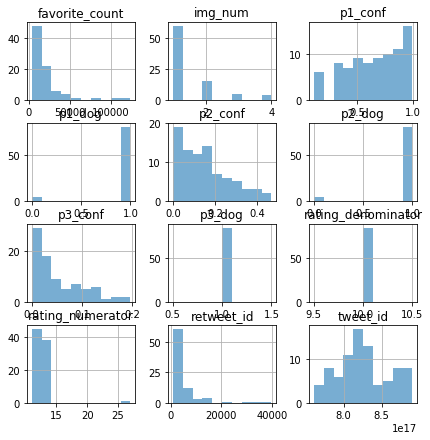

In [72]:
# Let's see what the distribution of our dataset looks like
df3.hist(figsize=(7,7),alpha=0.6);

In [73]:
# Let's create a function to give multiple plots
def curve(x,y,xlabel,ylabel,t,kind,fig=(8,6)):
    plt.figure(figsize=fig)
    kind(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(t)
    plt.show()

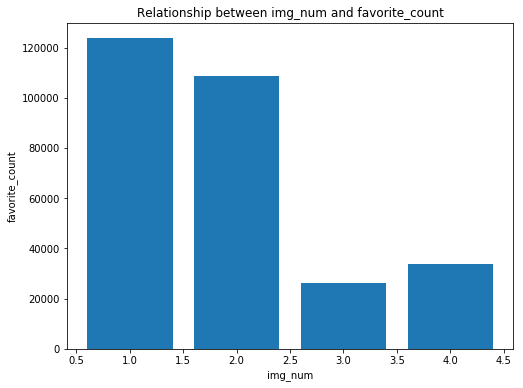

In [74]:
# Let's see what the relationship between number of images and favorite_count looks like
curve(df3['img_num'],df3['favorite_count'],'img_num','favorite_count','Relationship between img_num and favorite_count',plt.bar)

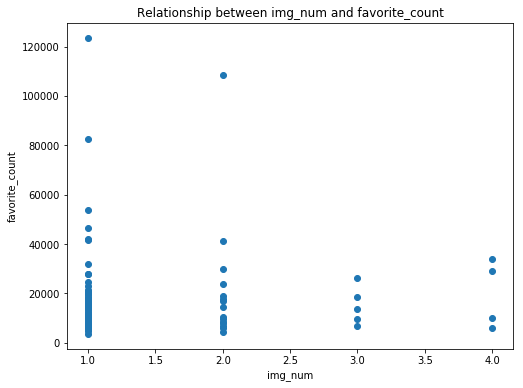

In [75]:
curve(df3['img_num'],df3['favorite_count'],'img_num','favorite_count','Relationship between img_num and favorite_count',plt.scatter)

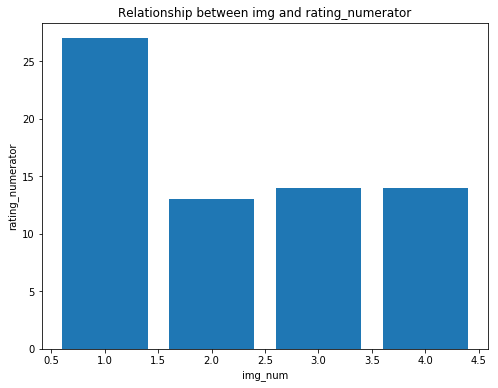

In [76]:
# Let's see what the relationship between number of images and rating_numerator looks like.
curve(df3['img_num'],df3['rating_numerator'],'img_num','rating_numerator','Relationship between img and rating_numerator',plt.bar)

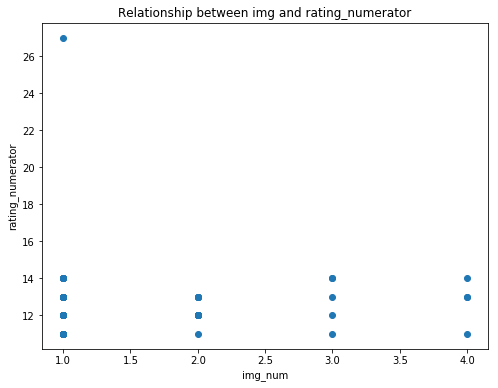

In [77]:
curve(df3['img_num'],df3['rating_numerator'],'img_num','rating_numerator','Relationship between img and rating_numerator',plt.scatter)

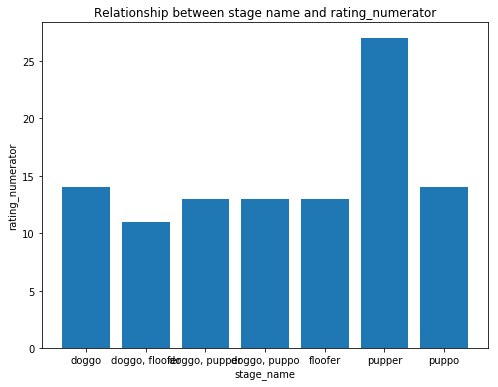

In [78]:
# Let's see what the relationship between stage_name and rating_numerator looks like.
curve(df3['stage_name'],df3['rating_numerator'],'stage_name','rating_numerator','Relationship between stage name and rating_numerator',plt.bar)

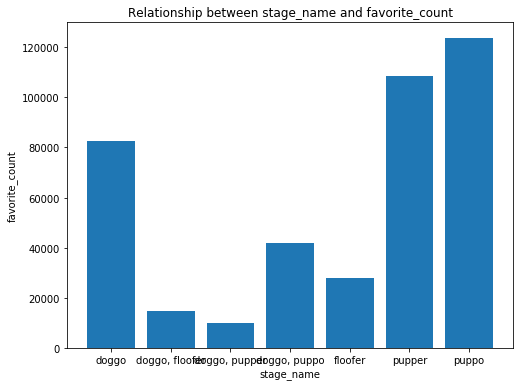

In [79]:
curve(df3['stage_name'],df3['favorite_count'],'stage_name','favorite_count','Relationship between stage_name and favorite_count',plt.bar)

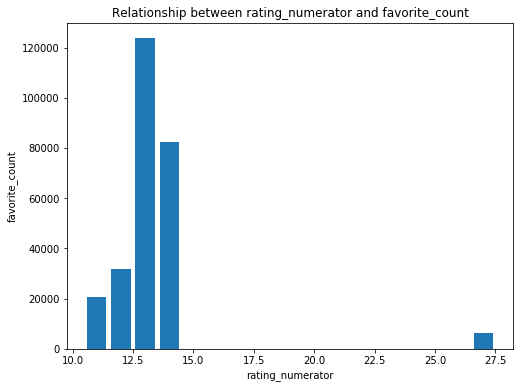

In [80]:
# Let's see what the relationship between favorite_count and rating_numerator looks like.
curve(df3['rating_numerator'],df3['favorite_count'],'rating_numerator','favorite_count','Relationship between rating_numerator and favorite_count',plt.bar)

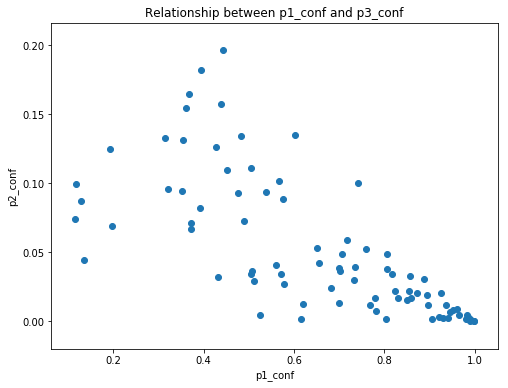

In [81]:
# Relationship betwwen the first and the last predictions
curve(df3['p1_conf'],df3['p3_conf'],'p1_conf','p2_conf','Relationship between p1_conf and p3_conf',plt.scatter)

### References
Udacity Classroom
https://www.codingem.com/python-download-file-from-url/
https://pandas.pydata.org/docs/reference/api/pandas.Series.str.rstrip.html
https://pandas.pydata.org/pandas-docs/version/0.24/reference/api/pandas.Series.str.strip.html
https://pandas.pydata.org/docs/reference/api
https://stackoverflow.com/questions/64413331/how-to-add-a-constant-value-to-a-column-in-python-pandas
https://stackoverflow.com/questions/37213556/remove-rows-that-contain-false-in-a-column-of-pandas-dataframe
https://datatofish.com/replace-character-pandas-dataframe/
https://thispointer.com/convert-column-values-to-lowercase-in-pandas-dataframe/
https://stackoverflow.com/questions/37213556/remove-rows-that-contain-false-in-a-column-of-pandas-dataframe
https://stackoverflow.com/questions/70888220/python-how-to-apply-function-uppercase-in-multiple-columns-pandas
https://www.geeksforgeeks.org/find-columns-shared-by-two-data-frames/
https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html
https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.melt.html
https://pandas.pydata.org/docs/user_guide/categorical.html
https://stackoverflow.com/questions/72575286/how-to-drop-rows-with-nan-in-a-column-in-a-pandas-dataframe
https://stackoverflow.com/questions/70182481/how-to-print-row-x-without-knowing-the-index-in-pandas
https://www.learneasysteps.com/how-to-calculate-top-5-max-values-in-pandas/
https://www.educative.io/answers/how-to-convert-series-to-dataframe-in-pandas

